In [1]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
!pip install decorator==5.0.9

  Using cached decorator-5.0.9-py3-none-any.whl (8.9 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


Specifying range of the fuzzy variables of quality , service as an input and tip as an
output

In [12]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

Automalically populate value of the input variables

In [13]:
quality.automf(3)
service.automf(3)

In [14]:
tip["low"] = fuzz.trimf(tip.universe, [0, 0, 13])
tip["medium"] = fuzz.trimf(tip.universe, [0, 13, 25])
tip["high"] = fuzz.trimf(tip.universe, [13, 25, 25])

Plotting graph and define all the fuzzy variables

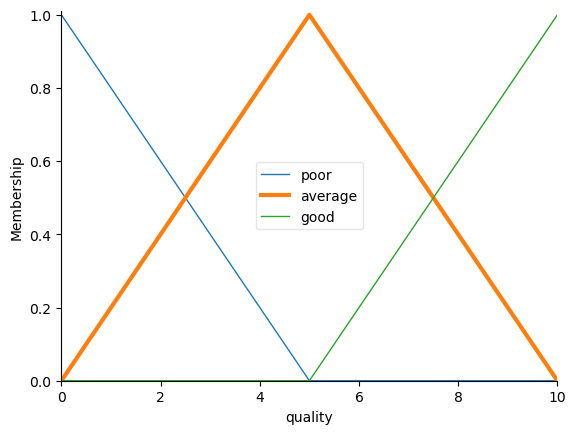

In [15]:
quality["average"].view()

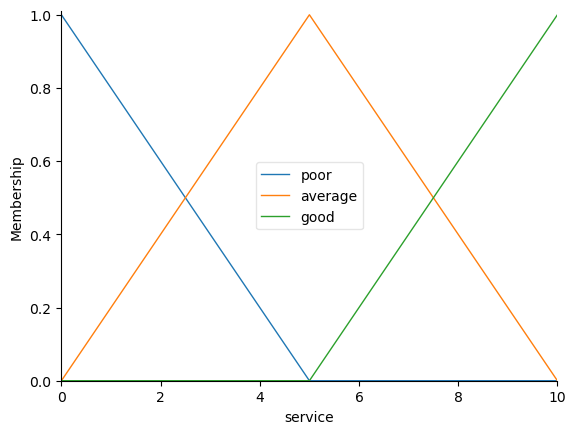

In [16]:
service.view()

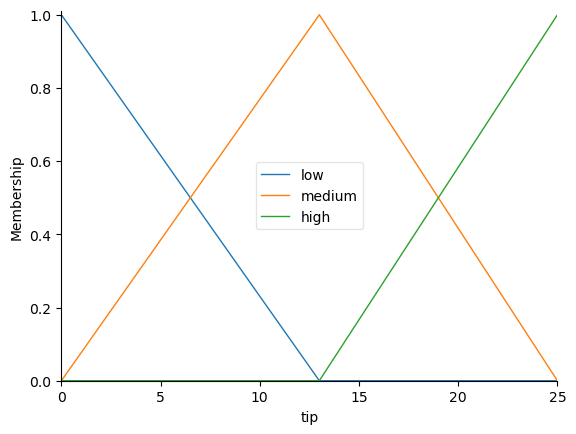

In [17]:
tip.view()

we required according to the value of the inputs that's why Setting up rules, corresponding to the input and the output

In [18]:
rule1 = ctrl.Rule(quality["poor"] & service["poor"], tip["low"])
rule1.view

<bound method Rule.view of IF quality[poor] AND service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax>

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

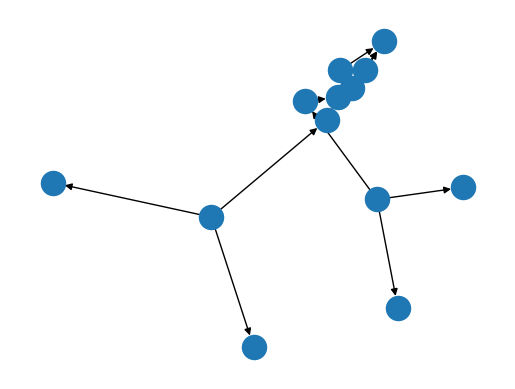

In [11]:
rule1.view()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

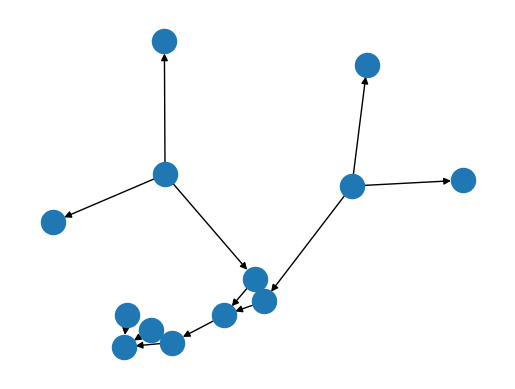

In [19]:
rule2 = ctrl.Rule(quality["average"] & service["average"], tip["medium"])
rule2.view()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

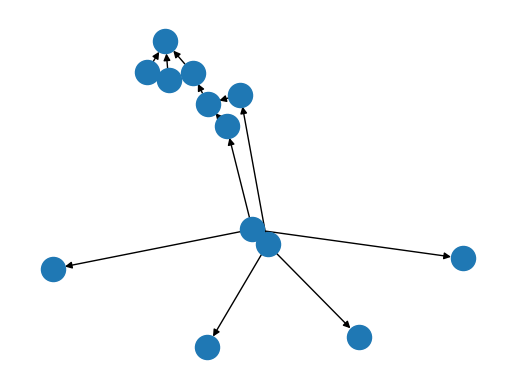

In [20]:
rule3 = ctrl.Rule(quality["good"] & service["good"], tip["high"])
rule3.view()

In [21]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Testing the output with the following inputs

In [22]:
tipping.input["quality"] = 6.5
tipping.input["service"] = 9.8
tipping.compute()

In [23]:
print(tipping.output["tip"])

17.93427234232227


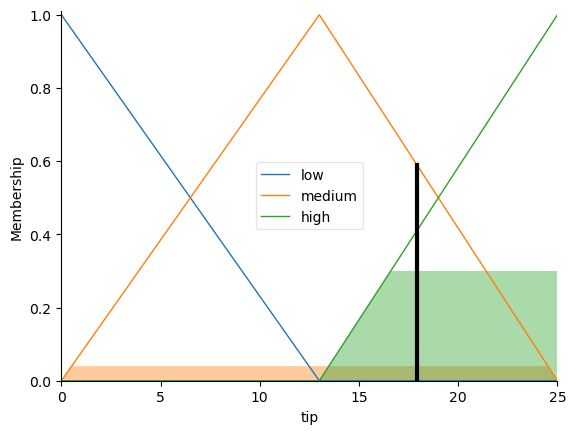

In [24]:
tip.view(sim=tipping)